# 1、普通线性回归

### 1.1 OLS回归

* 对于线性回归模型中，解释变量的估计系数，在 **coef_** 参数中得到，而对于截距项系数，可以在 **intercept_** 中得到。

* 线性回归模型是去最小化拟合结果与实际结果的残差的平方和

* **LinearRegression** 会接收其 **fit** 方法的数组X,y,并且在拟合后将其计算出的解释变量、截距项的系数分别存放在coef_和intercept_中

In [6]:
from sklearn import linear_model
import pandas as pd
import numpy as np
# 生成模拟的数据
df = pd.DataFrame({'x1':np.random.randn(10),'x2':np.random.randn(10),'y':np.arange(1,11)})
print(df)

         x1        x2   y
0 -0.846334 -0.599632   1
1  0.098812 -1.172374   2
2  0.282343 -1.394880   3
3 -0.864165  0.520508   4
4 -0.444380 -0.132791   5
5  1.999830  0.674573   6
6  0.615407  0.583752   7
7  1.131488 -0.598677   8
8  0.949680  1.230386   9
9  1.948539 -0.224125  10


#### 对于reg.fit(X,y)其中X，y的数据类型要求：
* scikit-learn要求X是一个特征矩阵，y是一个NumPy向量
* pandas构建在NumPy之上
* 因此，X可以是pandas的DataFrame，y可以是pandas的Series，scikit-learn可以理解这种结构

In [7]:
# 建立线性回归模型
reg = linear_model.LinearRegression()
reg.fit(df[['x1','x2']],df['y'])
print(reg.coef_,reg.intercept_)

[ 1.90166226  1.36417865] 4.72552726548


### for example 1:

In [10]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.head())
print(data.shape)    # 查看数据框的维度

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


#### 建立线性回归模型

In [11]:
x = data[['TV', 'Radio', 'Newspaper']]   # 解释变量
y = data['Sales']                        # 被解释变量
# 构造训练集和测试集
from sklearn.cross_validation import train_test_split
# 默认是将75% 25%分开测试集、训练集
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(150, 3) (150,) (50, 3) (50,)


In [17]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train,y_train)
print('截距项：%s' % linreg.intercept_,'解释变量系数：%s' % linreg.coef_)

截距项：2.87696662232 解释变量系数：[ 0.04656457  0.17915812  0.00345046]


#### 预测

In [18]:
y_pred = linreg.predict(x_test)
print(y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


#### 模型拟合结果的评价
* 1、平均绝对误差 |yi−y|
* 2、均方误差 MSE (yi−y)^2
* 3、均方根误差 RMSE

In [19]:
# 计算RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.40465142303


#### 特征选择
在之前展示的数据中，我们看到Newspaper和销量之间的线性关系比较弱，现在我们移除这个特征，看看线性回归预测的结果的RMSE如何？

In [20]:
X = data[['TV','Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


### for example 2:

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
# 加载数据集
diabetes = datasets.load_diabetes()
# 仅适用一个特征
diabetes_x = diabetes.data[:,np.newaxis,2]
# 将数据分为测试集和训练集
diabetes_x_train = diabetes_x[:-20]
diabetes_x_test = diabetes_x[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
# 建立线性回归模型
regr = linear_model.LinearRegression()
regr.fit(diabetes_x_train, diabetes_y_train)
print('回归系数: \n', regr.coef_)
print('均方误差:%.2f' % np.mean((regr.predict(diabetes_x_test)-diabetes_y_test)**2))

回归系数: 
 [ 938.23786125]
均方误差:2548.07


([], <a list of 0 Text yticklabel objects>)

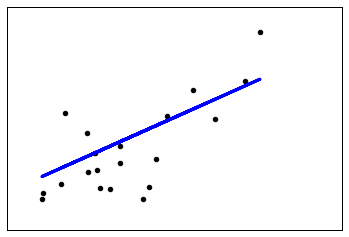

In [35]:
# 绘制回归图
plt.scatter(diabetes_x_test,diabetes_y_test,color='black')
plt.plot(diabetes_x_test,regr.predict(diabetes_x_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
#plt.show()

### 1.2 岭回归

岭回归是一种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。
一般来讲，普通回归X是列满秩的，而当某些列之间的线性相关性比较大时，将会出现不满秩的情况，即XTX接近于奇异，计算（XTX）-1时误差会很大，传统的最小二乘缺乏稳定性与可靠性。
通过确定的值可以使得在方差和偏差之间达到平衡：随着的增大，模型方差减小而偏差增大。

In [24]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 0.5)
reg.fit([[0,0],[0,0],[1,1]],[0,0.1,1])
print(reg.coef_,reg.intercept_)

[ 0.34545455  0.34545455] 0.136363636364


(0.01, 1e-10, -175.62010984827353, 274.02304530397788)

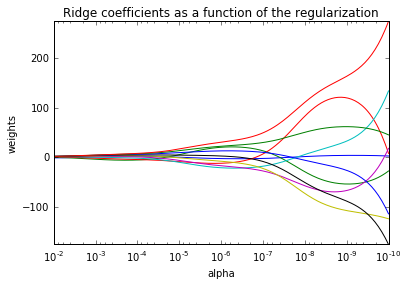

In [34]:
x = 1./(np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x,y)
    coefs.append(clf.coef_)
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
# plt.show()

Ridge类已经设置了一系列默认的参数，因此clf = Ridge()即可以完成实例化。但是，了解一下它的参数还是有必要的：
* alpha 正则化项的系数
* copy_x 是否对x数组进行复制，默认是True,如果选False的话会覆盖原有x数组
* fit_intercept 是否计算截距项
* max_inter 最大的迭代次数
* normalize 标准化x的开关，默认是False
* solver 在计算过程中选择的解决器
* ...
对于模型的好坏，Ridge当然提供了评价的方法——score
* score(X,y,sample_weight=None)：X为测试数据，y是测试数据的实际值，类型与fit中的相同，sample是权重

#### 岭回归模型 & 留一法交叉验证

In [28]:
# 生成模拟数据
from sklearn.datasets import make_regression
reg_data,reg_target = make_regression(n_samples=100,n_features=2,effective_rank=1,noise=10)

在linear_models模块中，有一个对象叫RidgeCV，表示岭回归交叉检验（ridge cross-validation）。这个交叉检验类似于留一交叉验证法（leave-one-out cross-validation，LOOCV）。这种方法是指训练数据时留一个样本，测试的时候用这个未被训练过的样本。

In [29]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([0.1,0.2,0.3,0.4]))
rcv.fit(reg_data,reg_target)
print(rcv.alpha_)    # alpha参数就是最优参数
rcv = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv.fit(reg_data, reg_target)

0.1


RidgeCV(alphas=array([ 0.08,  0.09,  0.1 ,  0.11,  0.12]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

在交叉检验的每一步里，模型的拟合效果都是用测试样本的误差表示

In [40]:
alphas_to_test = np.linspace(0.0001,0.05)
rcv3 = RidgeCV(alphas=alphas_to_test,store_cv_values=True)
rcv3.fit(reg_data,reg_target)

RidgeCV(alphas=array([ 0.0001 ,  0.00112,  0.00214,  0.00316,  0.00417,  0.00519,
        0.00621,  0.00723,  0.00825,  0.00927,  0.01028,  0.0113 ,
        0.01232,  0.01334,  0.01436,  0.01538,  0.01639,  0.01741,
        0.01843,  0.01945,  0.02047,  0.02149,  0.0225 ,  0.02352,
        0.02454,  0.02556...4185,
        0.04287,  0.04389,  0.04491,  0.04593,  0.04694,  0.04796,
        0.04898,  0.05   ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

通过100个样本的回归数据集，我们获得了50个不同的alpha值。我们可以看到50个误差值，最小的均值误差对应最优的alpha值：

In [38]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.018430612244897959

In [32]:
rcv3.alpha_

0.018430612244897959

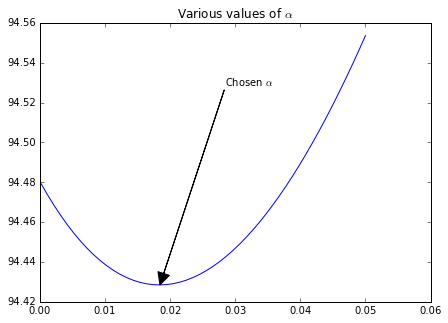

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(7,5))
ax.set_title(r"Various values of $\alpha$")
xy = (alphas_to_best[smallest_idx],rcv3.cv_values_.mean(axis=0)[smallest_idx])
xytext =  (xy[0] + .01, xy[1] + .1)
ax.annotate(r'Chosen $\alpha$', xy=xy, xytext=xytext,
            arrowprops=dict(facecolor='black', shrink=0, width=0))
ax.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0))

#### 自定义评分函数
* 用其他误差自定义评分函数，也可以实现，前面介绍过MAD误差，我们可以用他来进行评分，首先需要定义损失函数

In [41]:
def MAD(target,prediction):
    absolute_deviation = np.abs(target - prediction)
    return absolute_deviation.mean()

定义损失函数之后，我们用sklearn量度中的make_scorer函数来处理。这样做可以标准化自定义的函数，让scikit-learn对象可以使用它。另外，由于这是一个损失函数不是一个评分函数，是越低越好，所以要用sklearn来把最小化问题转化成最大化问题：

In [42]:
import sklearn
MAD = sklearn.metrics.make_scorer(MAD,greater_is_better=False)
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True, scoring=MAD)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.050000000000000003